**Грамматический анализатор для калькулятора**

Евгений Борисов <esborisov@sevsu.ru>

используем библиотеку PLY (Python Lex-Yacc)

---

Виталий Дятлов  
Разбор кода и построение синтаксических деревьев с PLY.   
https://habr.com/ru/post/191252/


David Beazley    
A simple calculator with variables.   
https://pythonrepo.com/repo/dabeaz-ply-python-text-processing


PLY (Python Lex-Yacc)  
https://ply.readthedocs.io/en/latest/ply.html


Ply   
https://www.skenz.it/compilers/ply

---

In [4]:
# !pip install ply

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 419.3 kB/s eta 0:00:0031m1.0 MB/s eta 0:00:01


In [2]:
# сюда вписываем имя нотебука, необходимо для корректной работы  PLY
__file__ = '01-ply-calc.ipynb' 

---

In [5]:
import ply.lex as lex

tokens = ( # декларируем список токенов
    'INTEGER',
    'PLUS','MINUS','TIMES','DIVIDE',
    'LPAREN','RPAREN',
    )

# определяем шаблоны токенов
t_PLUS    = r'\+'
t_MINUS   = r'-'
t_TIMES   = r'\*'
t_DIVIDE  = r'/'
t_LPAREN  = r'\('
t_RPAREN  = r'\)'

def t_INTEGER(t):
    r'\d+'
    t.value = int(t.value) # числа сразу преобразуем в формат INT
    return t

# пробел, табуляцию, перевод строки игнорируем
t_ignore = " \t\n\r"

# для всех прочих символов выводим сообщение об ошибке
def t_error(t): 
    print(f"Illegal character {t.value[0]!r}")
    t.lexer.skip(1)

In [6]:
lexer = lex.lex()

In [7]:
# проверяем лексер....

data = '''
    3 + (4 * 10)
  + -20 *2
'''
lexer.input(data)

def get_token(lexer):
    while True:
        tok = lexer.token()
        if not tok: break 
        yield tok
    
[ t for t in get_token(lexer) ]

[LexToken(INTEGER,3,1,5),
 LexToken(PLUS,'+',1,7),
 LexToken(LPAREN,'(',1,9),
 LexToken(INTEGER,4,1,10),
 LexToken(TIMES,'*',1,12),
 LexToken(INTEGER,10,1,14),
 LexToken(RPAREN,')',1,16),
 LexToken(PLUS,'+',1,20),
 LexToken(MINUS,'-',1,22),
 LexToken(INTEGER,20,1,23),
 LexToken(TIMES,'*',1,26),
 LexToken(INTEGER,2,1,27)]

---

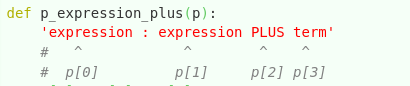

In [8]:
# описываем грамматику
import ply.yacc as yacc

precedence = ( # приоритет операций для разрешения неоднозначностей
    ('left','PLUS','MINUS'),
    ('left','TIMES','DIVIDE'),
    ('right','UMINUS'),
    )

# правила вывода (продукции грамматики)

def p_statement_expr(p):
    'statement : expression'
    print(p[1])

def p_expression_binop(p):
    '''expression : expression PLUS expression
                  | expression MINUS expression
                  | expression TIMES expression
                  | expression DIVIDE expression'''
    if   p[2] == '+': p[0] = p[1] + p[3]
    elif p[2] == '-': p[0] = p[1] - p[3]
    elif p[2] == '*': p[0] = p[1] * p[3]
    elif p[2] == '/': p[0] = p[1] / p[3]

def p_expression_uminus(p):
    'expression : MINUS expression %prec UMINUS'
    p[0] = -p[2]

def p_expression_group(p):
    'expression : LPAREN expression RPAREN'
    p[0] = p[2]

def p_expression_number(p):
    'expression : INTEGER'
    p[0] = p[1]


def p_error(p):
    print(f"ERROR: incorrect syntax at {p.value!r}")

In [9]:
parser = yacc.yacc(write_tables=False)

Generating LALR tables


In [10]:
# while True:
#     try:
#         s = input('calc > ')
#         parser.parse(s)
#     except Exception as e:
#         print('error:',e)
#         break

In [11]:
data = '''
    (3 + 4) * 10
  + -20/7 *2
'''

parser.parse(data)

64.28571428571429


In [12]:
data = '-3 + 4 * 10.0' # ERROR: это не пройдёт, в грамматике описан только INT

parser.parse(data)

Illegal character '.'
ERROR: incorrect syntax at 0
